# Operasi Dasar Pengolahan Sinyal
Eksplorasi Interaktif Sinyal 1D dan 2D dengan Python

Dokumen ini mereplikasi fungsionalitas interaktif dari sebuah aplikasi web sederhana yang dirancang untuk membantu memahami konsep dasar pengolahan sinyal digital. Alih-alih antarmuka grafis, kita akan menggunakan kode Python, NumPy, dan Matplotlib untuk mengimplementasikan dan memvisualisasikan operasi-operasi ini.

---

## Teori & Konsep Dasar

### 1. Representasi Sinyal
- **Sinyal 1D:** f(t) atau f[n] - fungsi dari waktu atau indeks diskrit.
- **Sinyal 2D:** f(x,y) atau f[m,n] - fungsi dari koordinat spasial, seperti gambar digital.

### 2. Operasi Dasar
- **Penskalaan (Scaling):** Mengubah kekuatan atau amplitudo sinyal. $y(t) = a \cdot x(t)$
- **Penggeseran (Shifting):** Menggeser sinyal dalam domain waktu atau ruang. $y(t) = x(t - \tau)$
- **Penjumlahan (Addition):** Menggabungkan dua sinyal. $y(t) = x_1(t) + x_2(t)$
- **Perkalian (Multiplication):** Melakukan modulasi amplitudo. $y(t) = x_1(t) \cdot x_2(t)$
- **Konvolusi (Convolution):** Operasi fundamental untuk filtering.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve

# Set default plotting style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]

# Fungsi untuk menghasilkan sinyal 1D
def generate_signal(signal_type, t, freq, amp, phase):
    if signal_type == 'sine':
        return amp * np.sin(2 * np.pi * freq * t + phase)
    elif signal_type == 'cosine':
        # Perbaikan: Tambahkan kasus untuk sinyal 'cosine'
        return amp * np.cos(2 * np.pi * freq * t + phase)
    elif signal_type == 'square':
        return amp * np.sign(np.sin(2 * np.pi * freq * t + phase))
    elif signal_type == 'sawtooth':
        return amp * (2 * ((freq * t) % 1) - 1)
    elif signal_type == 'gaussian':
        sigma = 0.5 / freq
        mu = 2.5
        return amp * np.exp(-0.5 * ((t - mu) / sigma)**2)
    elif signal_type == 'chirp':
        return amp * np.sin(2 * np.pi * (freq * t + 0.5 * freq * t**2))

# Fungsi untuk menerapkan operasi pada sinyal 1D
def apply_operation(signal, operation, param):
    if operation == 'scale':
        return signal * param
    elif operation == 'shift':
        shift_samples = int(param * 100)
        shifted = np.roll(signal, shift_samples)
        shifted[:shift_samples] = 0
        return shifted
    elif operation == 'add':
        return signal + param
    elif operation == 'multiply':
        t = np.linspace(0, 5, len(signal))
        mod_signal = generate_signal('sine', t, param, 1, 0)
        return signal * mod_signal
    else:
        return signal

# Fungsi untuk membuat pola 2D (gambar)
def generate_2d_pattern(pattern_type, size):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    
    if pattern_type == 'sinusoid':
        return np.sin(5 * np.pi * X) * np.cos(5 * np.pi * Y)
    elif pattern_type == 'gaussian':
        sigma = 0.5
        return np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    elif pattern_type == 'checkerboard':
        return np.array([[(1 if (i//4 + j//4) % 2 == 0 else -1) for j in range(size)] for i in range(size)])
    elif pattern_type == 'gradient':
        return (X + Y) / 2
    else:
        return np.zeros((size, size))

# Fungsi untuk menerapkan filter pada pola 2D
def apply_2d_filter(pattern, filter_type):
    if filter_type == 'blur':
        kernel = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]]) / 16
        return convolve2d(pattern, kernel, mode='same', boundary='symm')
    elif filter_type == 'edge':
        kernel = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])
        return convolve2d(pattern, kernel, mode='same', boundary='symm')
    elif filter_type == 'sharpen':
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
        return convolve2d(pattern, kernel, mode='same', boundary='symm')
    else:
        return pattern

## Visualisasi Sinyal 1D

### Penskalaan
Penskalaan mengubah amplitudo sinyal. Nilai $a>1$ memperbesar sinyal, sedangkan $0<a<1$ mengecilkannya.

### Penjumlahan
Penjumlahan menambahkan offset konstan pada sinyal, menggeser seluruh gelombang ke atas atau ke bawah.

### Perkalian
Perkalian dua sinyal akan menghasilkan modulasi amplitudo. Frekuensi hasil merupakan kombinasi dari frekuensi kedua sinyal.

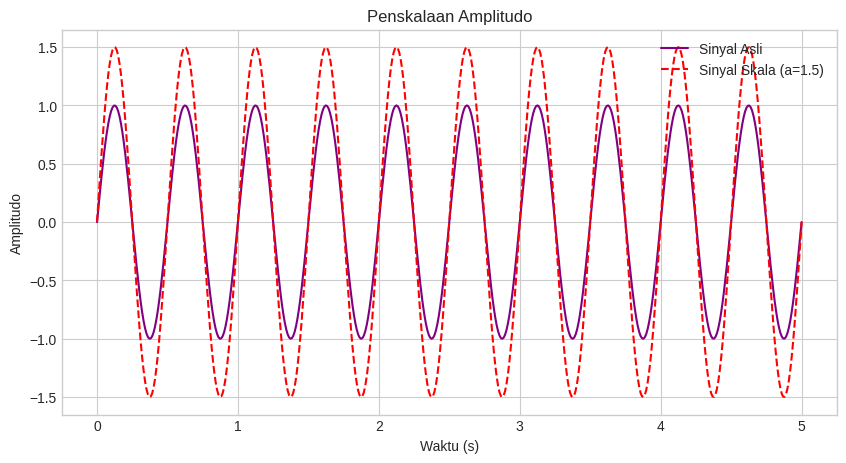

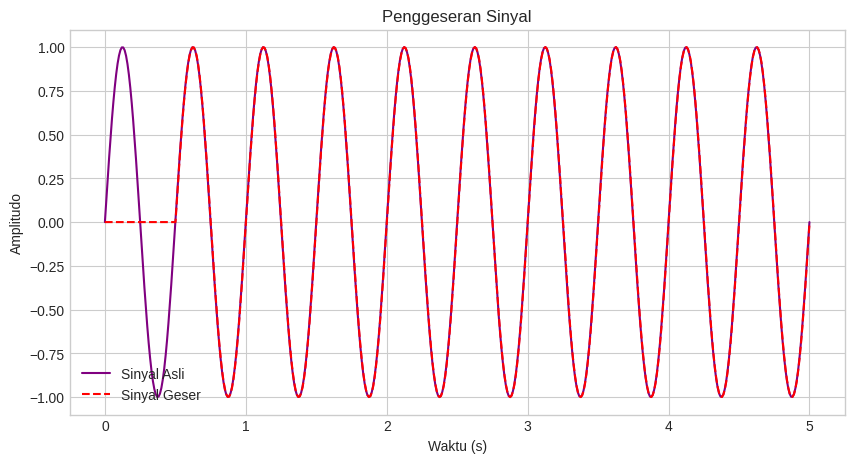

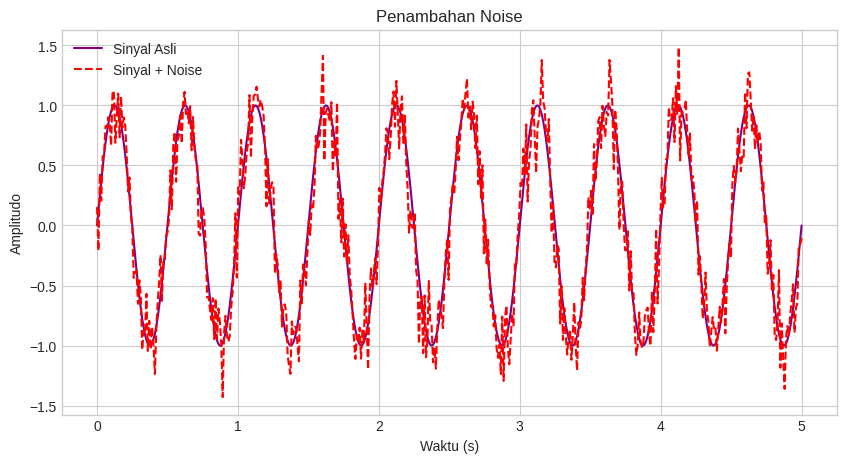

In [2]:
# Visualisasi Operasi pada Sinyal 1D
t = np.linspace(0, 5, 500)
original_signal = generate_signal('sine', t, freq=2, amp=1, phase=0)

# --- Penskalaan ---
scaled_signal = apply_operation(original_signal, 'scale', param=1.5)
plt.figure(figsize=(10, 5))
plt.plot(t, original_signal, label='Sinyal Asli', color='purple')
plt.plot(t, scaled_signal, label='Sinyal Skala (a=1.5)', linestyle='--', color='red')
plt.title('Penskalaan Amplitudo')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()

# --- Penggeseran ---
shifted_signal = apply_operation(original_signal, 'shift', param=0.5)
plt.figure(figsize=(10, 5))
plt.plot(t, original_signal, label='Sinyal Asli', color='purple')
plt.plot(t, shifted_signal, label='Sinyal Geser', linestyle='--', color='red')
plt.title('Penggeseran Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()

# --- Penjumlahan dengan noise ---
noise = np.random.normal(0, 0.2, len(t))
noisy_signal = original_signal + noise
plt.figure(figsize=(10, 5))
plt.plot(t, original_signal, label='Sinyal Asli', color='purple')
plt.plot(t, noisy_signal, label='Sinyal + Noise', linestyle='--', color='red')
plt.title('Penambahan Noise')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()

## Visualisasi Sinyal 2D (Image Processing)

Sinyal 2D, seperti gambar, dapat diolah menggunakan filter. Filter ini adalah matriks kecil yang dikonvolusi dengan sinyal 2D untuk memodifikasi karakteristiknya.

- **Gaussian Blur:** Merata-ratakan nilai piksel tetangga untuk mengurangi detail dan noise.
- **Edge Detection:** Menyoroti area di mana intensitas warna berubah secara tiba-tiba, seperti tepi objek.
- **Sharpen:** Meningkatkan kontras di sekitar tepi, membuat gambar terlihat lebih tajam.

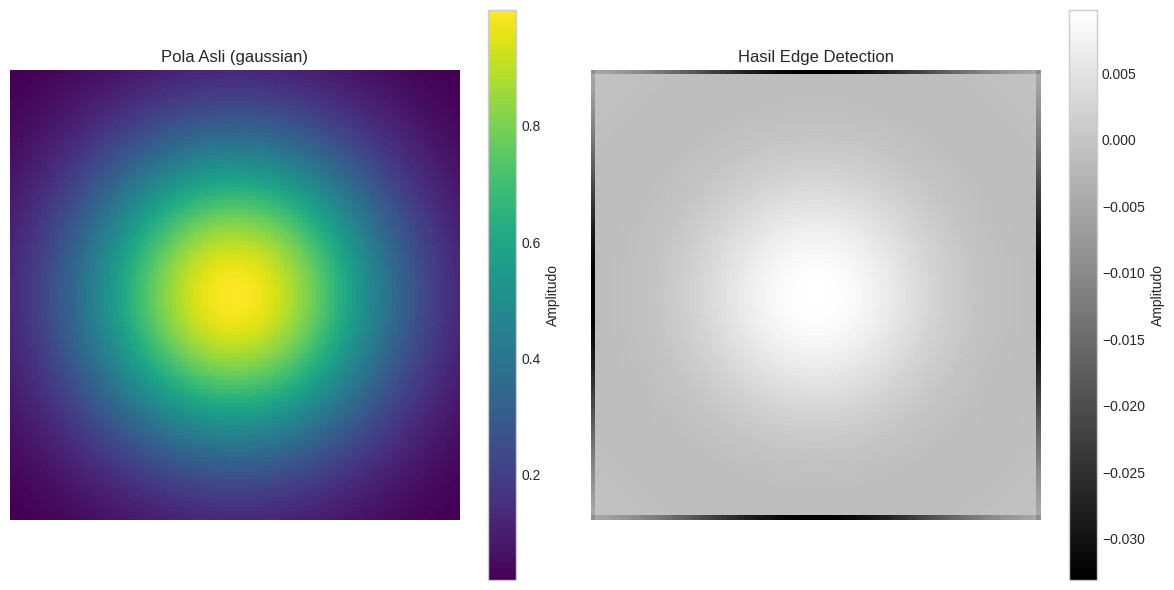

In [3]:
# Visualisasi Filter pada Sinyal 2D
pattern_type = 'gaussian'
size = 100
original_pattern = generate_2d_pattern(pattern_type, size)

# --- Plot pola asli ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_pattern, cmap='viridis')
plt.title(f'Pola Asli ({pattern_type})')
plt.colorbar(label='Amplitudo')
plt.axis('off')

# --- Plot hasil filter ---
filtered_pattern = apply_2d_filter(original_pattern, 'edge')
plt.subplot(1, 2, 2)
plt.imshow(filtered_pattern, cmap='gray')
plt.title('Hasil Edge Detection')
plt.colorbar(label='Amplitudo')
plt.axis('off')
plt.tight_layout()
plt.show()

## Kombinasi Sinyal

Sinyal kompleks dapat dibuat dengan menggabungkan sinyal-sinyal sederhana. Operasi seperti penjumlahan dan konvolusi sangat umum dalam pengolahan sinyal.

- **Penjumlahan:** Menggabungkan dua gelombang, menghasilkan interferensi konstruktif atau destruktif.
- **Konvolusi:** Operasi matematis yang digunakan untuk menerapkan filter pada sinyal. Hasil konvolusi menunjukkan respons satu sinyal terhadap sinyal lainnya.

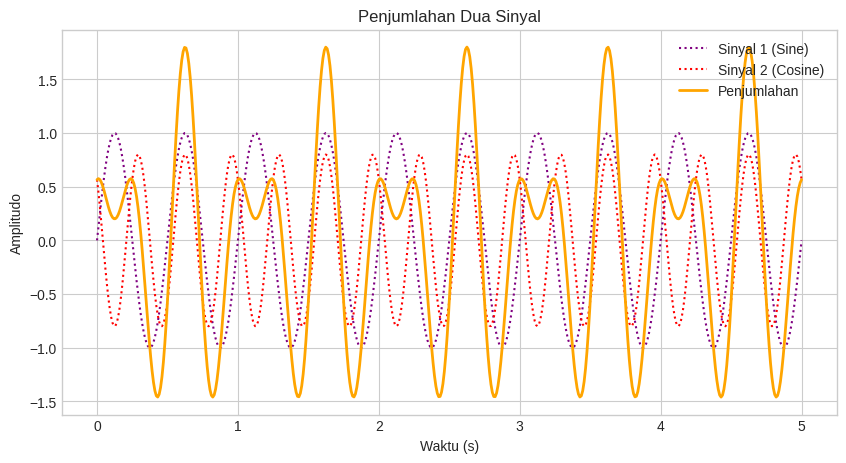

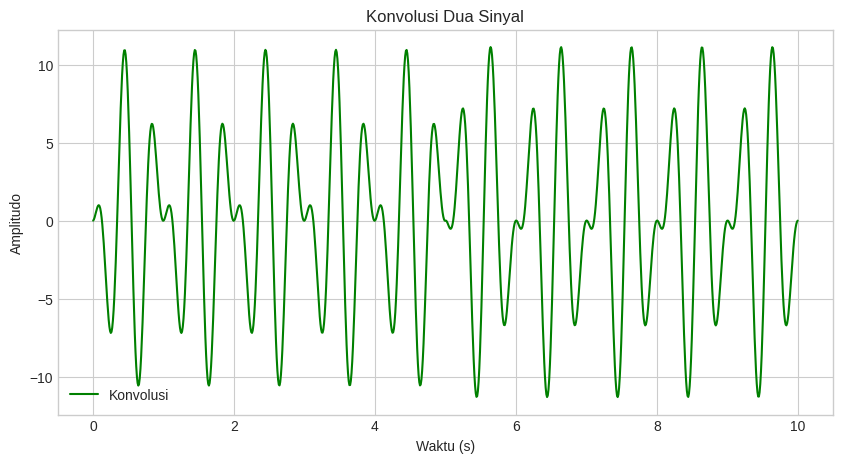

In [7]:
# Visualisasi Kombinasi Sinyal
t = np.linspace(0, 5, 500)
signal1 = generate_signal('sine', t, freq=2, amp=1, phase=0)
signal2 = generate_signal('cosine', t, freq=3, amp=0.8, phase=np.pi/4)

# --- Plot Penjumlahan Sinyal ---
combined_add = signal1 + signal2
plt.figure(figsize=(10, 5))
plt.plot(t, signal1, label='Sinyal 1 (Sine)', linestyle=':', color='purple')
plt.plot(t, signal2, label='Sinyal 2 (Cosine)', linestyle=':', color='red')
plt.plot(t, combined_add, label='Penjumlahan', color='orange', linewidth=2)
plt.title('Penjumlahan Dua Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()

# --- Plot Konvolusi Sinyal ---
combined_conv = np.convolve(signal1, signal2, mode='full')
t_conv = np.linspace(0, 10, len(combined_conv))
plt.figure(figsize=(10, 5))
plt.plot(t_conv, combined_conv, label='Konvolusi', color='green')
plt.title('Konvolusi Dua Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()